# **Lab 7.1 Data Augmentation with PyTorch**

In [128]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Subset
from torch.nn import functional as F
import random
import cv2
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt
import os
import zipfile
from collections import Counter

Complete the `load_data()` function that loads the image using `ImageFolder()` with the specific `transforms.compose()` provided below.
`load_data()` will return DataLoader() and print the information about the Dataset.

`transforms.Compose()` :
- `transforms.Resize()`
- `transforms.ToTensor()`
- `transforms.Pad()`
- `transforms.RandomAffine(degrees=45, translate=(0.1, 0.1),scale=(0.8, 1.2), shear=45)`
- `transforms.CenterCrop()`

Resource : [`transforms.Compose()`](https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html#compose), [`torchvision.transforms v1`](<https://pytorch.org/vision/stable/transforms.html#v1-api-reference:~:text=custom)%20tv_tensor%20type.-,V1%20API%20Reference,-Geometry>), [`ImageFolder`](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html), [`Dataloader`](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#:~:text=Preparing%20your%20data%20for%20training%20with%20DataLoaders)

In [129]:
# Step 1: Extract the ZIP file
zip_file_path = 'lab7_1_Ship.zip'  
extract_path = 'Lab7_1_Ship_Dataset'

# Check if the extraction folder already exists
if not os.path.exists(extract_path):
    # Create the extraction folder
    os.makedirs(extract_path)
    
    # Step 2: Extract the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
else:
    print(f'The folder {extract_path} already exists. Skipping extraction.')

The folder Lab7_1_Ship_Dataset already exists. Skipping extraction.


In [130]:
def load_data(path):
    ### START CODE HERE ###
    # Define the transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Pad(223, padding_mode=r'reflect'),
        transforms.RandomAffine(degrees=45, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=45),
        transforms.CenterCrop((224, 224))  # Adjust crop size as needed
    ])

    # Load the dataset
    dataset = ImageFolder(root=path, transform=transform)

    # Create DataLoader
    # data_loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=16, pin_memory=True)
    data_loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0, pin_memory=True)

    return data_loader, dataset

    ### END CODE HERE ###

Use your load_data() function to load the dataset in the cell below. Then, display the image from the first batch.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
📃Train Dataset:
	Number of images in class battleship: 44
	Number of images in class patrol boat: 35
	Number of images in class submarine: 35
	Number of samples: 114
```


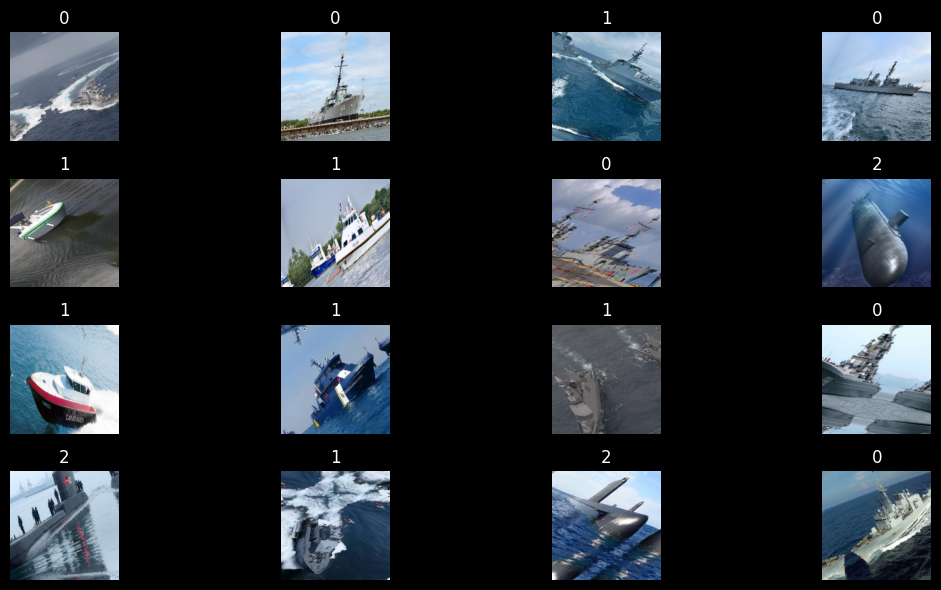

</details>

In [142]:
### START CODE HERE ###
def imshow_grid(batch, labels, class_names):
    """Display a grid of images with their labels.

    Args:
        batch: A batch of images (Tensor).
        labels: Corresponding labels for the images (Tensor).
        class_names: List of class names for the labels.
    """
    plt.figure(figsize=(10, 10))
    for i in range(16):  # Display the first 16 images
        plt.subplot(4, 4, i + 1)  # Create a 4x4 grid
        img = batch[i].numpy().transpose((1, 2, 0))  # Convert to HWC format
        img = np.clip(img, 0, 1)  # Ensure pixel values are between 0 and 1
        plt.imshow(img)
        plt.title(f"Label: {class_names[labels[i].item()]}")
        plt.axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

def get_dataset_classes(dataset):
    """Retrieves class names and their corresponding indices from the dataset.

    Args:
        dataset: The dataset object (e.g., from ImageFolder or CustomImageDataset).
    
    Returns:
        dataset_classes: List of class names.
        class_names: List of corresponding indices for the classes.
    """
    dataset_classes = dataset.classes  # e.g., ['battleship', 'patrol boat', 'submarine']
    class_names = list(range(len(dataset_classes)))
    return dataset_classes, class_names

def print_dataset_info(dataset_path, dataset, batch=None, labels=None):
    """Prints information about the dataset.

    Args:
        dataset: The dataset object (e.g., from ImageFolder or CustomImageDataset).
        dataset_path: The path to the dataset directory.
        batch: A batch of images (optional).
        labels: Corresponding labels for the batch (optional).
    """
    # Print class names and their corresponding indices
    
    dataset_classes, class_names = get_dataset_classes(dataset)
    print('class_names: dataset.classes')
    print(dataset_classes)

    for class_name, class_index in zip(dataset_classes, class_names):
        print(f"{class_index}: {class_name}")

    print('-' * 100)
    
    # Print batch shape and labels shape if provided
    if batch is not None and labels is not None:
        print(f'Batch Shape: {batch.shape}, Labels Shape: {labels.shape}')
    else:
        print('Batch and labels shapes are not provided.')

    print('-' * 100)

    # Print dataset information
    print(f"📃 {os.path.basename(dataset_path).capitalize()} Dataset:")
    
    # Check if the dataset has an attribute for samples
    if hasattr(dataset, 'samples'):
        # Count number of images in each class for ImageFolder
        class_counts = Counter(label for _, label in dataset.samples)
    else:
        # Count number of images in each class for CustomImageDataset
        class_counts = Counter(os.path.basename(os.path.dirname(img_path)) for img_path in dataset.image_files)

    # Print the count for each class
    for class_index, count in class_counts.items():
        if isinstance(class_index, int) and hasattr(dataset, 'classes'):
            class_name = dataset.classes[class_index]
        else:
            class_name = class_index  # If it's already a class name

        print(f"\tNumber of images in class {class_name}: {count}")

    # Total number of samples
    total_samples = len(dataset)
    print(f"\tNumber of samples: {total_samples}")
### END CODE HERE ###

class_names: dataset.classes
['battleship', 'patrol boat', 'submarine']
0: battleship
1: patrol boat
2: submarine
----------------------------------------------------------------------------------------------------
Batch Shape: torch.Size([16, 3, 224, 224]), Labels Shape: torch.Size([16])
----------------------------------------------------------------------------------------------------
📃 Train Dataset:
	Number of images in class battleship: 44
	Number of images in class patrol boat: 35
	Number of images in class submarine: 35
	Number of samples: 114


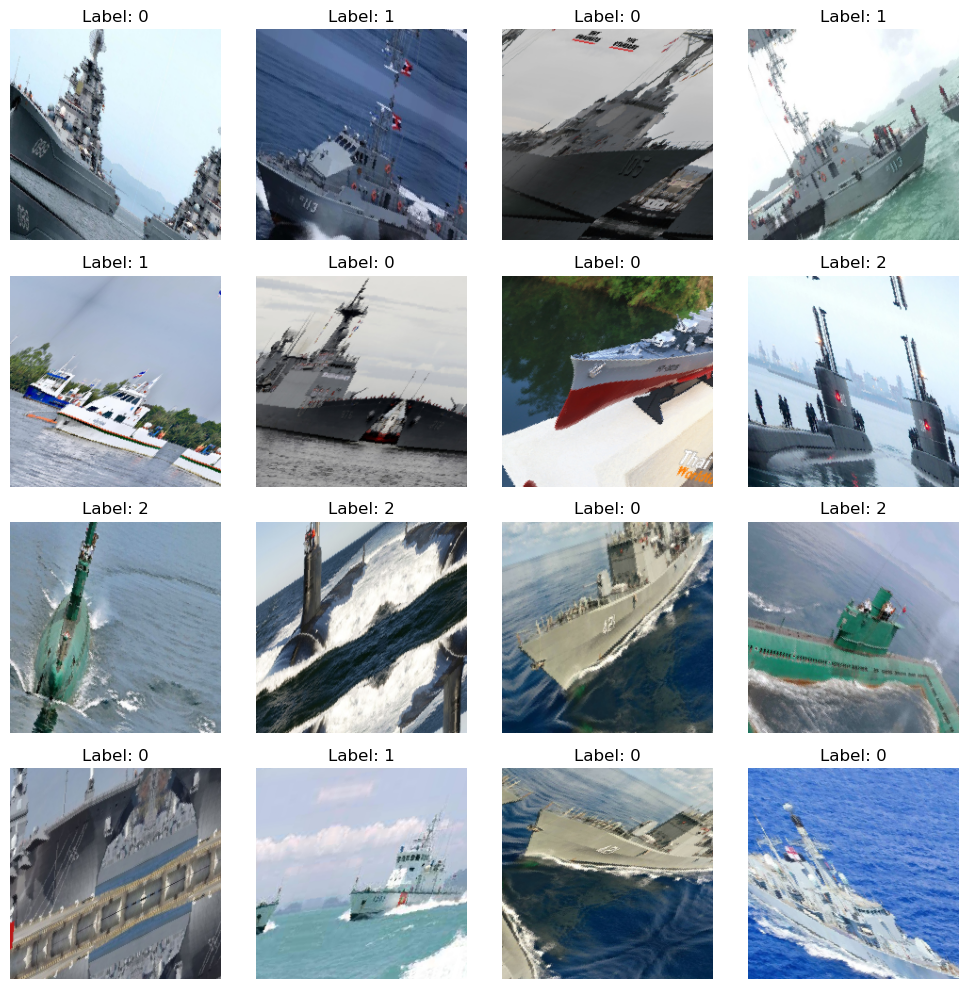

In [143]:
### START CODE HERE ###
dataset_path = extract_path+'/ship/train'
data_loader, dataset  = load_data(dataset_path)

# Get a batch of images
data_iter = iter(data_loader)
batch, labels = next(data_iter)

dataset_classes = dataset.classes  # e.g., ['battleship', 'patrol boat', 'submarine']
class_names = list(range(len(dataset_classes))) # e.g., [0, 1, 2]

print_dataset_info(dataset_path, dataset, batch, labels)

imshow_grid(batch, labels, class_names)
### END CODE HERE ###

Now, let's create your own `CustomImageDataset` that performs the augmentation as in the previous section, but also includes the methods `add_gaussian_blur()` and `add_gaussian_noise()`. **<font color="red">DO NOT</font>** use `transforms.Compose()`.

Resource : [CustomImageDataset](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#:~:text=.show()-,Dataset%20class,-torch.utils.data)

In [139]:
### START CODE HERE ###
class CustomImageDataset(Dataset):
    def __init__(self, data_dir, resize=224, pad=((0, 0), (0, 0), (0, 0)), padding_mode='constant', 
                 rotate=(-45, 45), shear=(-0.5, 0.5), gauss_noise=False, 
                 center_crop=224, p=0.5):
        self.resize = resize
        self.pad = pad
        self.padding_mode = padding_mode
        self.rotate = rotate
        self.shear = shear
        self.gauss_noise = gauss_noise
        self.center_crop = center_crop
        self.p = p
        self.data_dir = data_dir
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.image_files = self._get_image_files()

    def _get_image_files(self):
        image_files = []
        for cls_name in self.classes:
            cls_dir = os.path.join(self.data_dir, cls_name)
            image_files.extend([os.path.join(cls_dir, fname) for fname in os.listdir(cls_dir) 
                                if fname.endswith(('jpg', 'png', 'jpeg'))])
        return image_files

    def _gaussian_blur(self, image):
        gauss_kernel_size_pool = [5, 7, 9, 11]
        gauss_kernel_size = random.choice(gauss_kernel_size_pool)
        gauss_blur_image = cv2.GaussianBlur(image, (gauss_kernel_size, gauss_kernel_size), 0)
        return gauss_blur_image

    def _add_gaussian_noise(self, image):
        if self.gauss_noise and random.random() < self.p:
            noisy_image = random_noise(image, var=0.02, mode='gaussian')
            return (noisy_image * 255).astype(np.uint8)  # Convert back to uint8
        return image

    def _normalize(self, image): 
        return (image - image.min()) / (image.max() - image.min())

    def _padding(self, image, pad, padding_mode):
        return cv2.copyMakeBorder(image, pad[0][0], pad[0][1], pad[1][0], pad[1][1], 
                                  getattr(cv2, f'BORDER_{padding_mode.upper()}'))

    def _center_crop_image(self, image, crop_size):
        h, w, _ = image.shape
        start_h = (h - crop_size) // 2
        start_w = (w - crop_size) // 2
        return image[start_h:start_h + crop_size, start_w:start_w + crop_size]

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        class_name = os.path.basename(os.path.dirname(image_path))
        label = self.class_to_idx[class_name]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.resize is not None:
            image = cv2.resize(image, (self.resize, self.resize))
        
        if self.pad[0][0] > 0 or self.pad[1][0] > 0:
            image = self._padding(image, self.pad, self.padding_mode)

        if self.rotate != (0, 0) and random.random() < self.p:
            angle = random.randint(self.rotate[0], self.rotate[1])
            rows, cols, _ = image.shape
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
            image = cv2.warpAffine(image, M, (cols, rows))

        if self.center_crop is not None:
            image = self._center_crop_image(image, self.center_crop)

        image = self._normalize(image)
        image = self._add_gaussian_noise(image)
        image = self._gaussian_blur(image) if random.random() < self.p else image
        
        image = torch.from_numpy(np.array(image)).permute(2, 0, 1)  # Convert to CHW format
        return image, label

    def __len__(self):
        return len(self.image_files)
### END CODE HERE ###

Use your `CustomImageDataset()` function. Then, display the image from the first batch.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

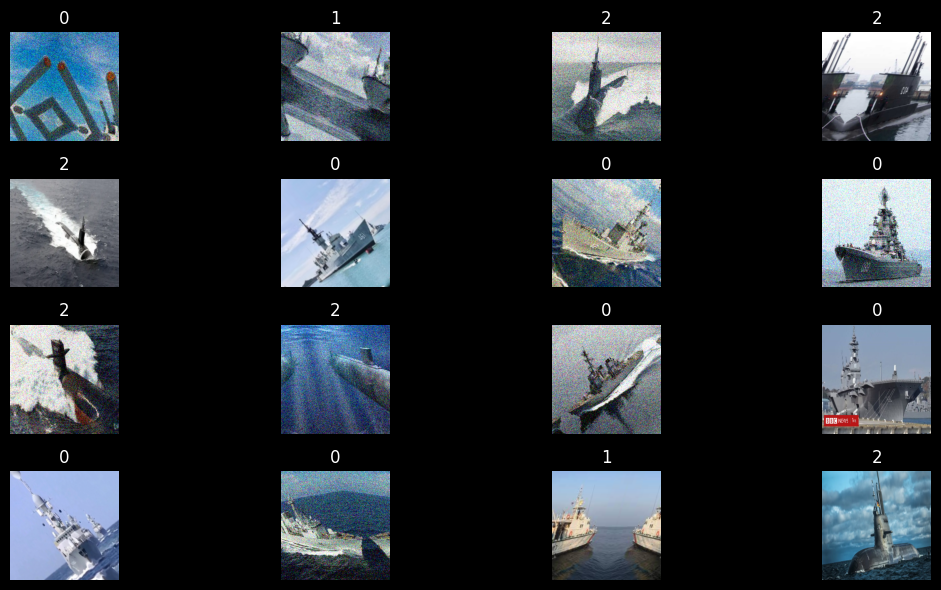

</details>

In [145]:
### START CODE HERE ###
dataset = CustomImageDataset(dataset_path,
                            resize=224,
                            pad=((224,224),(224,224),(0,0)),
                            padding_mode='reflect',
                            rotate=(-45,45),
                            shear=(-0.5,0.5),
                            gauss_noise=True,
                            center_crop=224,
                            p=0.5
                           )

dataset_classes = dataset.classes  #['battleship', 'patrol boat', 'submarine']
class_names = [0, 1, 2]

# พิมพ์ชื่อคลาสและค่า class_names คู่กัน
print('class_names: dataset.classes')
print(dataset_classes)

for class_name, class_index in zip(dataset_classes, class_names):
    print(f"{class_index}: {class_name}")
    
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)

# Get a batch of images
data_iter = iter(data_loader)
batch, labels = next(data_iter)

print('-'*100)
print(f'Batch Shape: {batch.shape}, Labels Shape: {labels.shape}')
print('-'*100)

print_dataset_info(dataset_path, dataset, batch, labels)

imshow_grid(batch, labels, class_names)
### END CODE HERE ###

class_names: dataset.classes
['battleship', 'patrol boat', 'submarine']
0: battleship
1: patrol boat
2: submarine
----------------------------------------------------------------------------------------------------
Batch Shape: torch.Size([16, 3, 224, 224]), Labels Shape: torch.Size([16])
----------------------------------------------------------------------------------------------------
class_names: dataset.classes
['battleship', 'patrol boat', 'submarine']
0: battleship
1: patrol boat
2: submarine
----------------------------------------------------------------------------------------------------
Batch Shape: torch.Size([16, 3, 224, 224]), Labels Shape: torch.Size([16])
----------------------------------------------------------------------------------------------------
📃 Train Dataset:


TypeError: list indices must be integers or slices, not str

---
# Questions
1. Discuss effects and benefits of fill_mode or padding_mode.
2. What would be amount of augmentation should be so that it would not effect the training performance?
3. How can we create Salt-and-Pepper Noise, which is the type that greatly affect the image quality?
4. What would be transform parameter to simulate camera lense effect?